In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("winequality-red.csv") 

In [3]:
# Check top few records
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


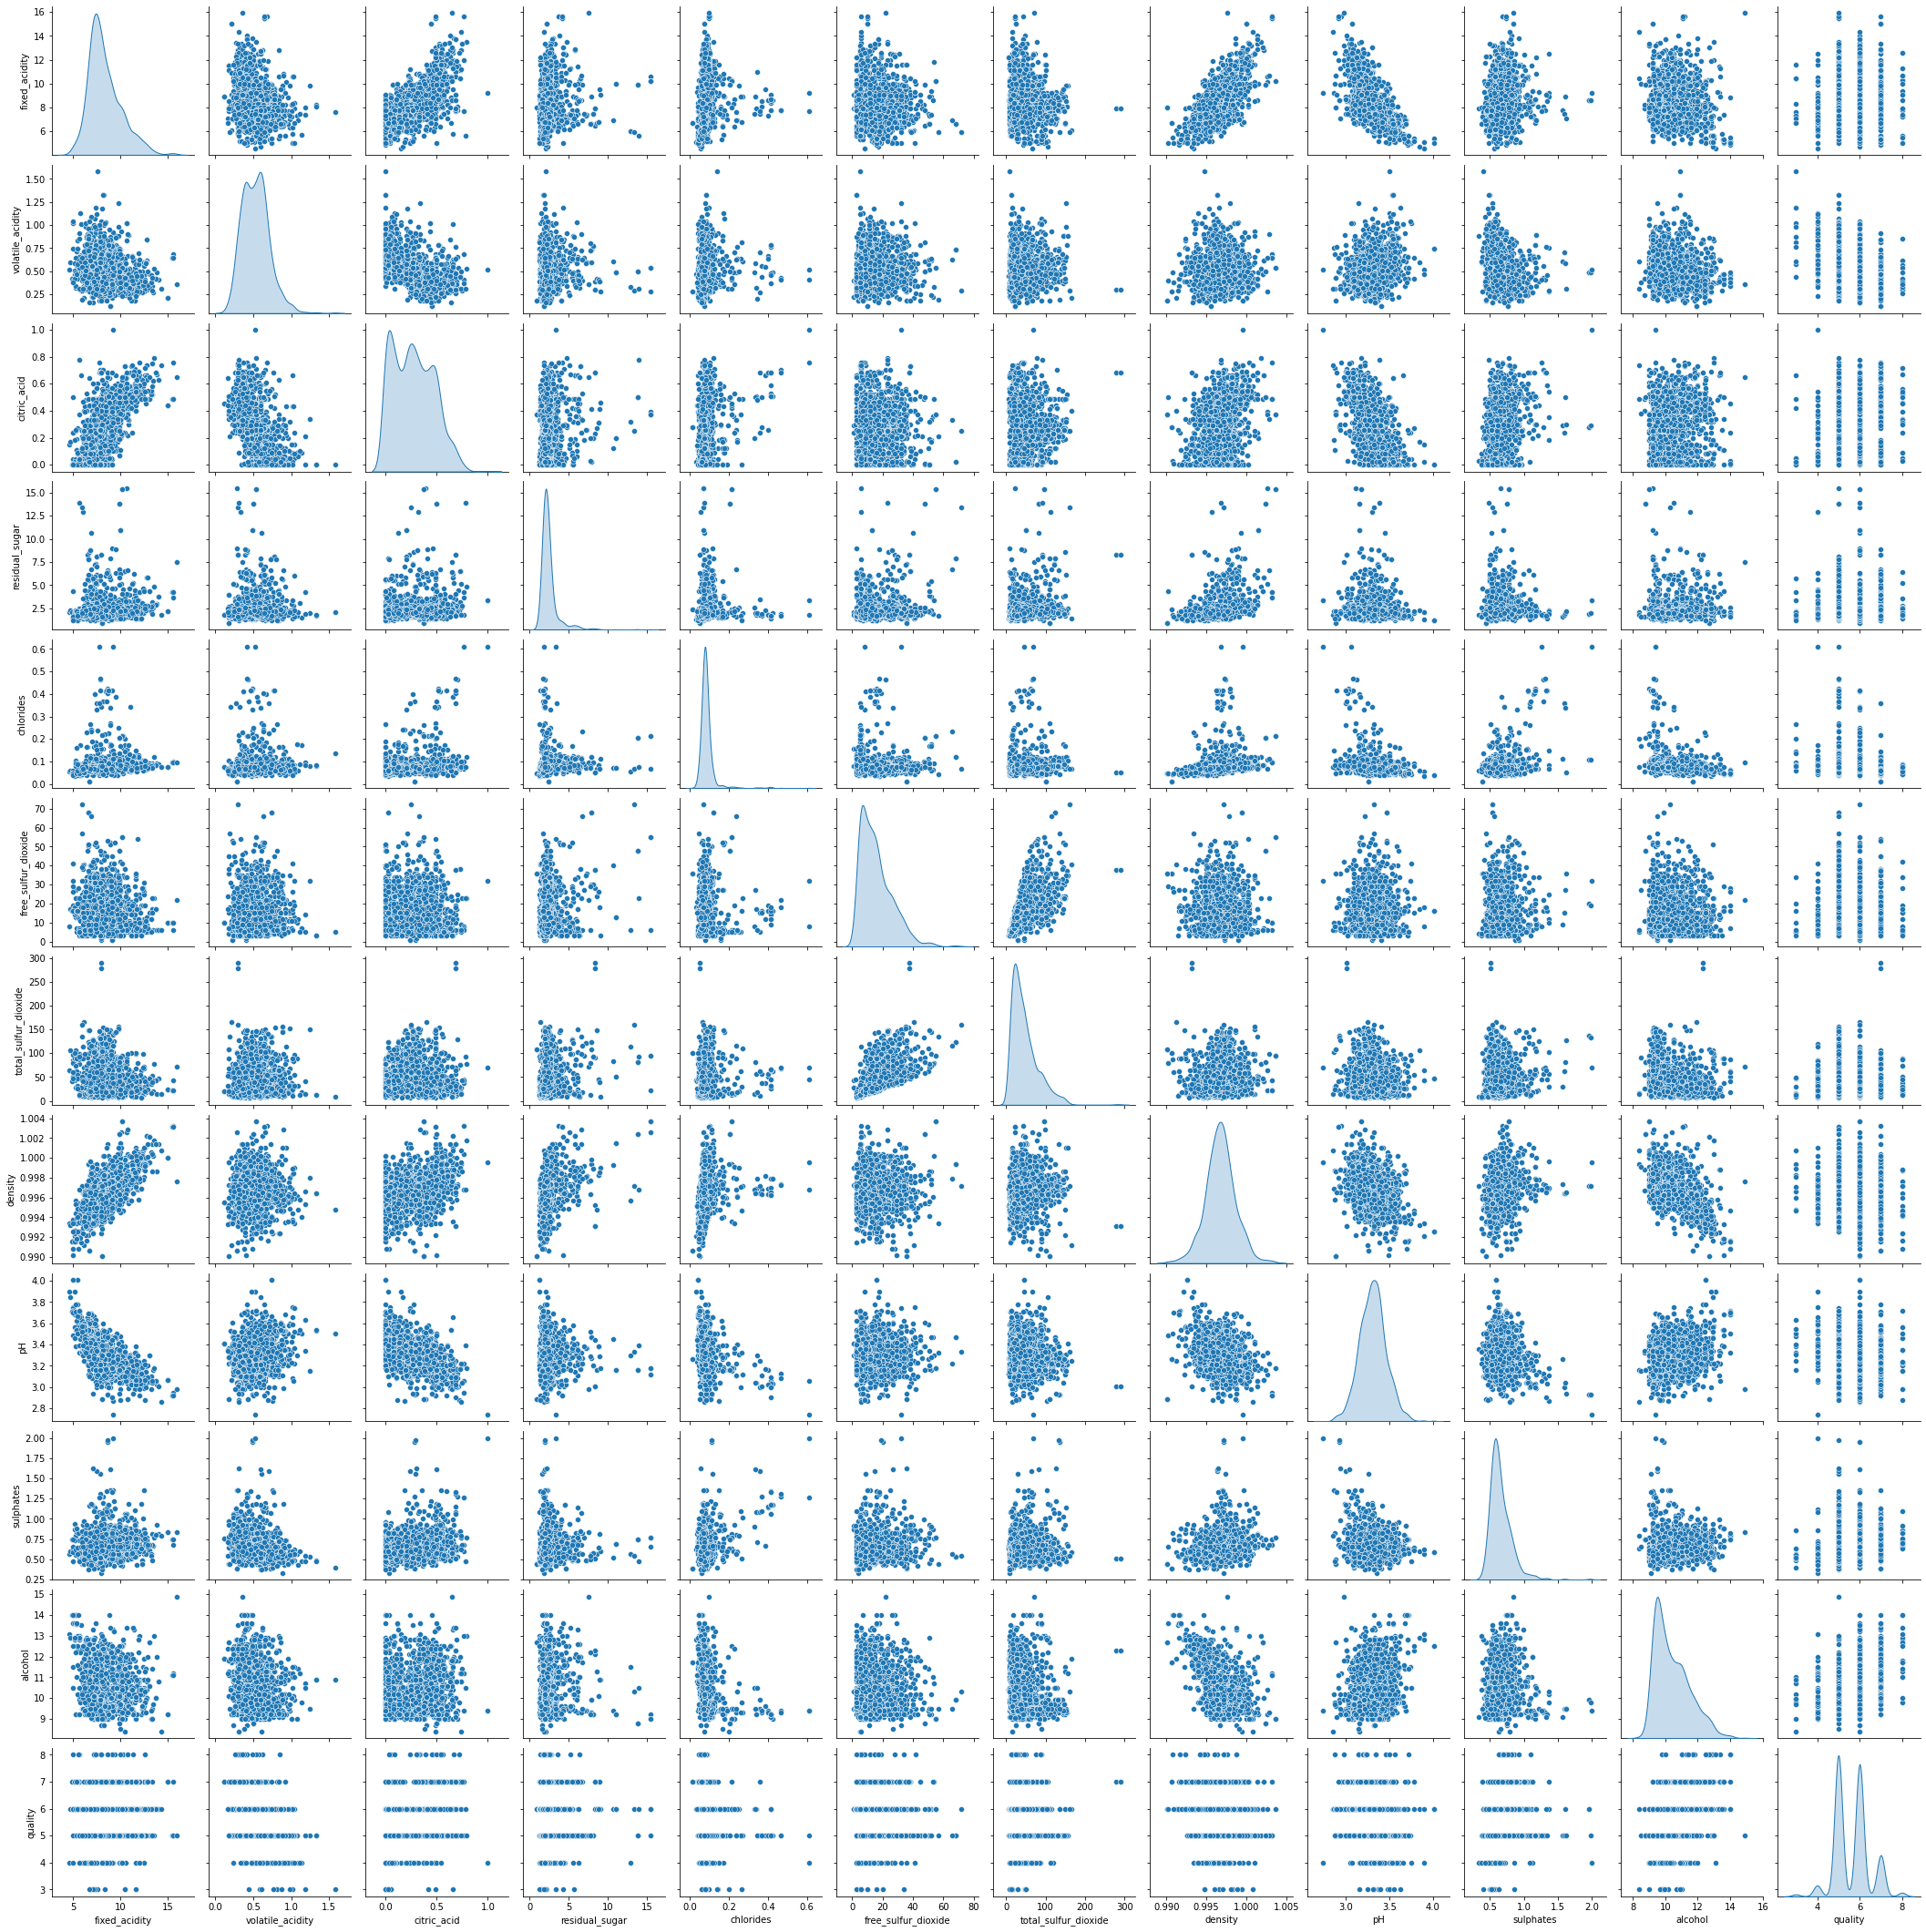

In [6]:

sns.pairplot(wine_data, diag_kind='kde')   # to plot density curve instead of histogram



In [7]:
from scipy.stats import zscore

wine_data_z = wine_data.apply(zscore)

In [8]:
cluster_range = range( 2, 20)   
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(wine_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,15779.439511
1,3,14035.528125
2,4,12676.383425
3,5,11357.130590
4,6,10572.822049
5,7,9817.497041
6,8,9439.576499
7,9,9079.556702
8,10,8807.120892
9,11,8593.971116


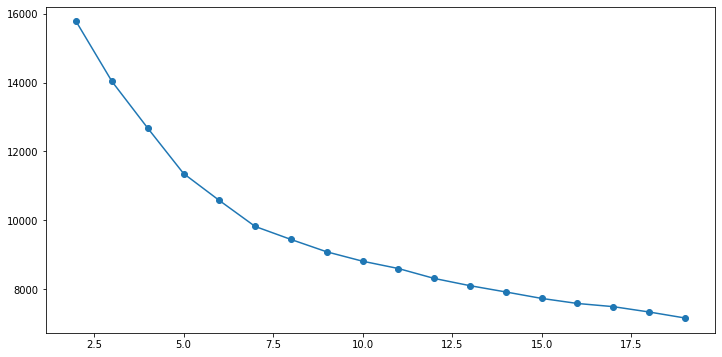

In [9]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [10]:
# The elbow plot shows that 7 might be a good choice for K and it seems logical given we know there are 7 qualities of wine

In [11]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(wine_data_z)


KMeans(n_clusters=4, random_state=1)

In [12]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-0.05921743,  0.07721099,  0.10016584,  0.46311935,  0.03848128,
         1.06822043,  1.36745946,  0.40402771, -0.17387847, -0.18993351,
        -0.62200358, -0.46696208],
       [-0.57425406, -0.49523509, -0.09889911, -0.20857446, -0.38864701,
         0.16884671, -0.21503223, -1.12492672,  0.50978768,  0.18813807,
         1.21027203,  0.85030143],
       [ 1.28595516, -0.62308012,  1.16902972,  0.1157905 ,  0.43834975,
        -0.50413716, -0.45087502,  0.79810211, -0.91014267,  0.62874212,
         0.09284544,  0.34458167],
       [-0.4782432 ,  0.67295737, -0.78394829, -0.22742323, -0.08078697,
        -0.40229534, -0.383344  , -0.09281304,  0.40450114, -0.42275819,
        -0.4266153 , -0.46924359]])

In [13]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z) )
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.059217,0.077211,0.100166,0.463119,0.038481,1.068220,1.367459,0.404028,-0.173878,-0.189934,-0.622004,-0.466962
1,-0.574254,-0.495235,-0.098899,-0.208574,-0.388647,0.168847,-0.215032,-1.124927,0.509788,0.188138,1.210272,0.850301
2,1.285955,-0.623080,1.169030,0.115791,0.438350,-0.504137,-0.450875,0.798102,-0.910143,0.628742,0.092845,0.344582
3,-0.478243,0.672957,-0.783948,-0.227423,-0.080787,-0.402295,-0.383344,-0.092813,0.404501,-0.422758,-0.426615,-0.469244


In [14]:
prediction=cluster.predict(wine_data_z)
wine_data_z["GROUP"] = prediction


In [15]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

wine_data_z.groupby("GROUP").count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
GROUP,,,,,,,,,,,,
0,332,332,332,332,332,332,332,332,332,332,332,332
1,338,338,338,338,338,338,338,338,338,338,338,338
2,373,373,373,373,373,373,373,373,373,373,373,373
3,556,556,556,556,556,556,556,556,556,556,556,556


array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'citric_acid'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'fixed_acidity'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'pH'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'quality'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'residual_sugar'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'sulphates'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'volatile_acidity'}, xlabel='[GROUP]'>]],
      dtype=object)

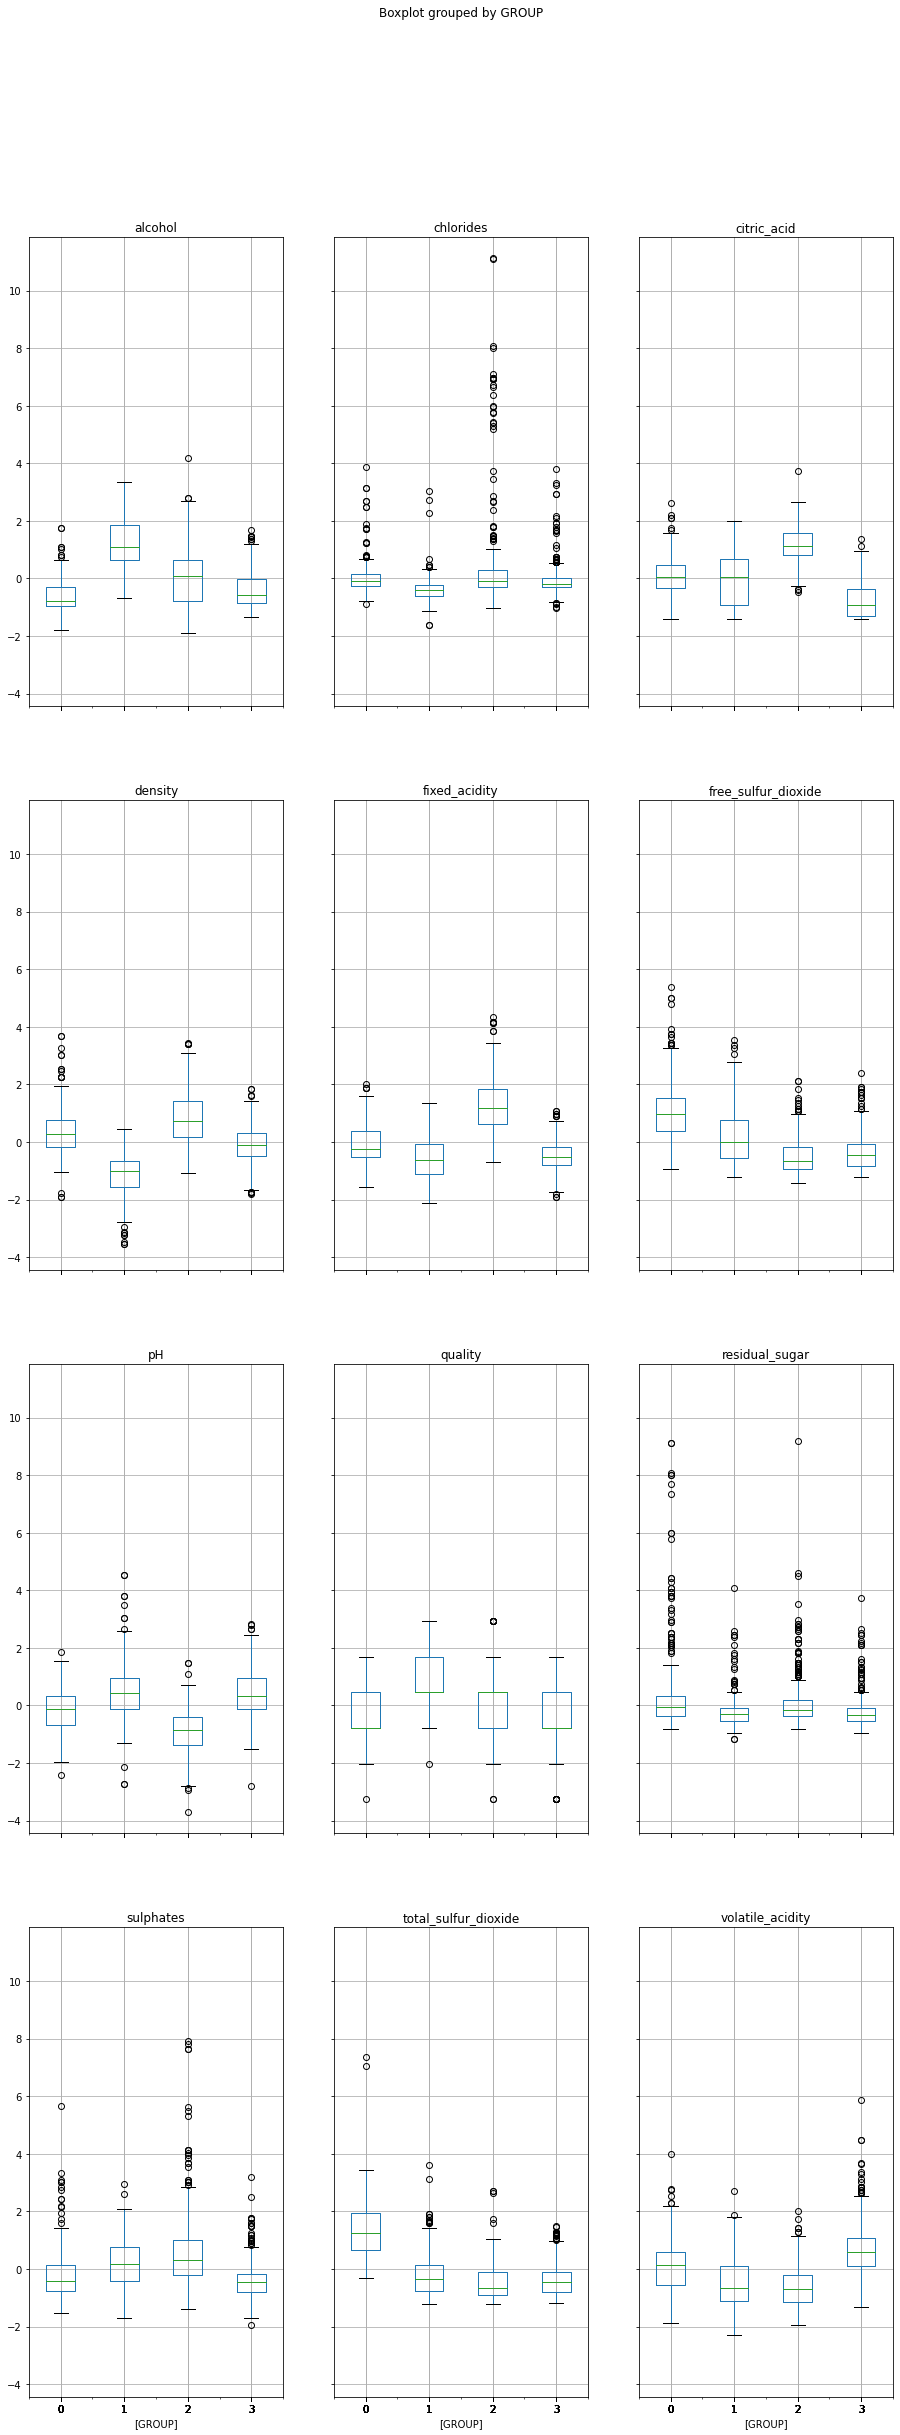

In [16]:
import matplotlib.pylab as plt

wine_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))



In [17]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers



In [18]:
# Addressing outliers at group level

data = wine_data_z  
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(wine_data_z['GROUP']))


array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'citric_acid'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'density'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'fixed_acidity'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'pH'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'quality'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'residual_sugar'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'volatile_acidity'}, xlabel='[GROUP]'>]],
      dtype=object)

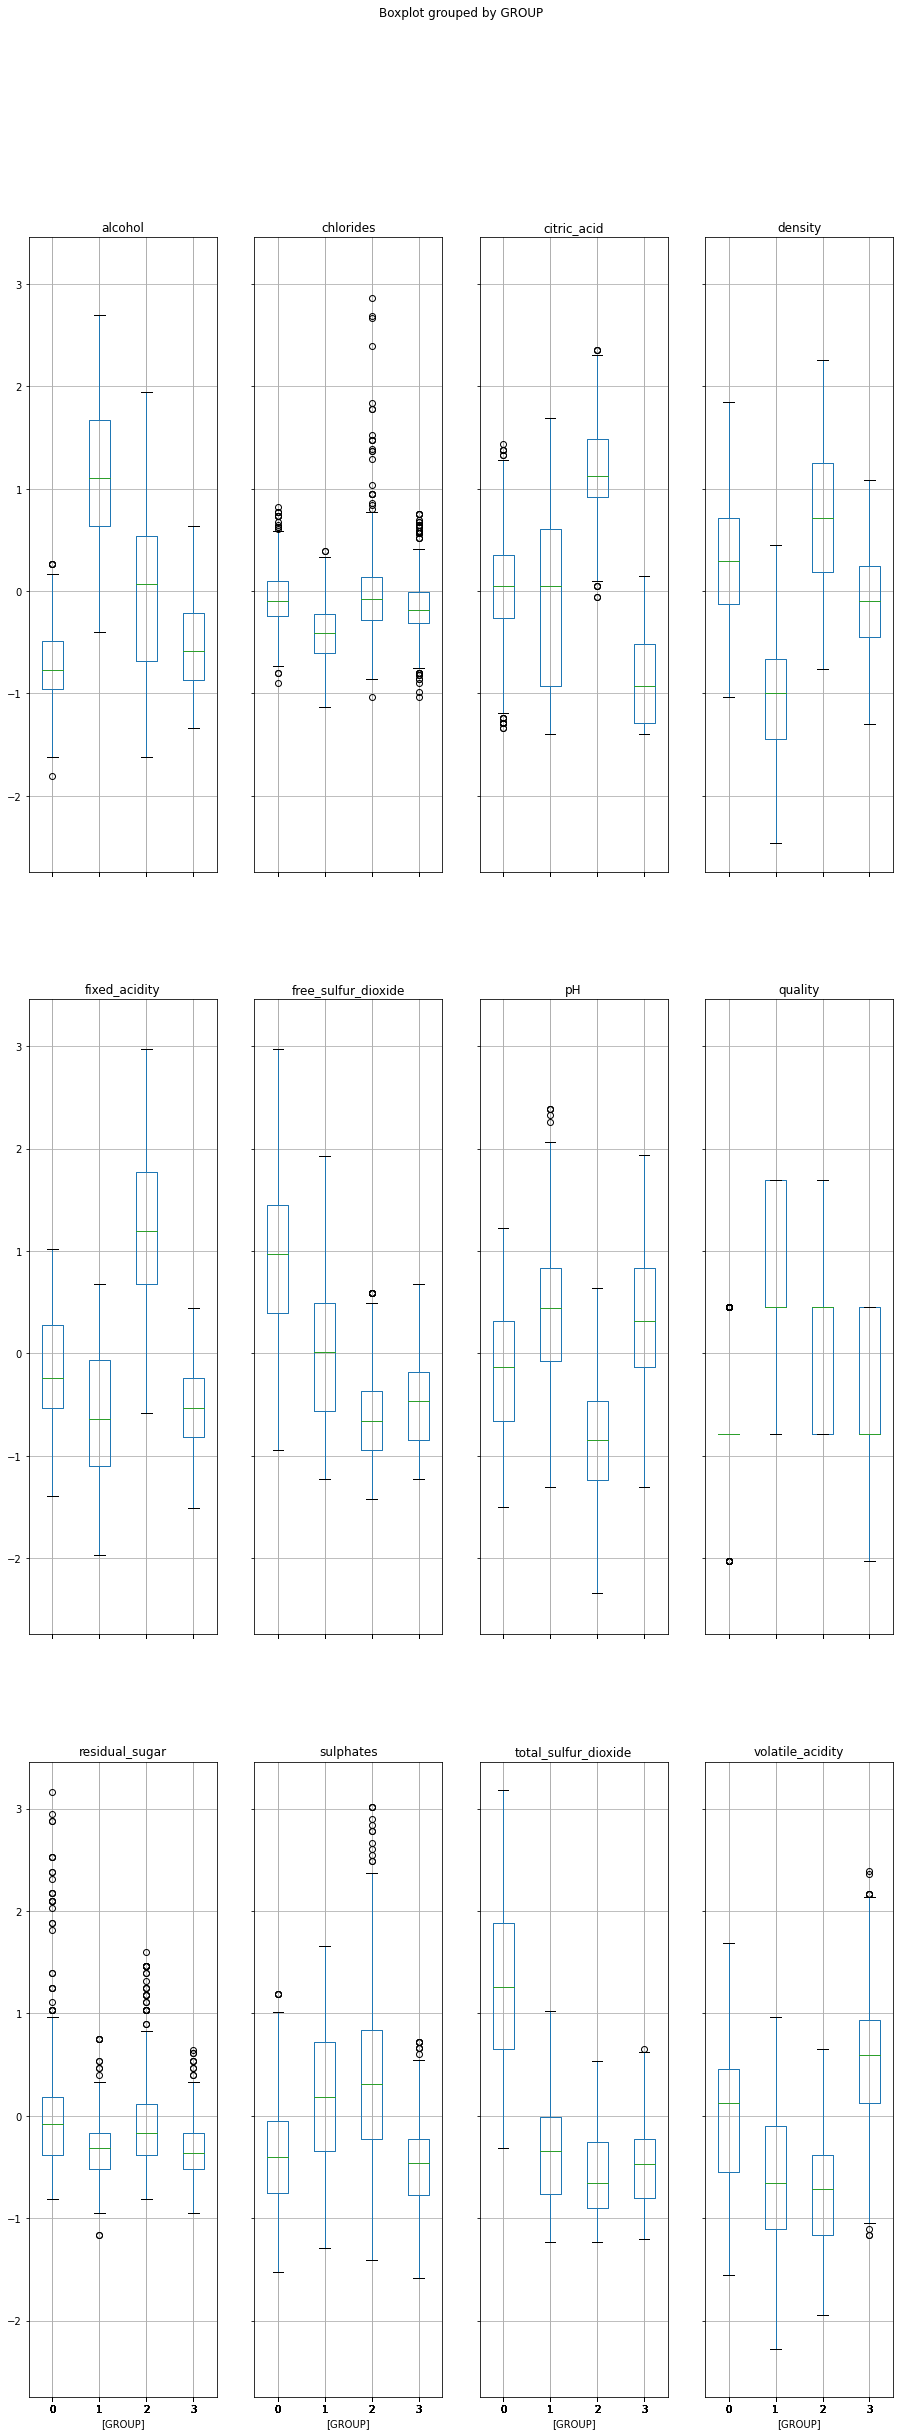

In [19]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 40))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them
